---
### Подключение библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
### Исследовательский анализ данных

In [2]:
df = pd.read_csv('weather.csv')
df.head()

,date,temperature,pressure,humidity,sunshine
0,2022-01-01 00:30:00,-21.5,765.5,83.0,7.07
1,2022-01-01 01:00:00,-21.7,765.5,83.0,7.07
2,2022-01-01 01:30:00,-21.8,765.5,83.0,7.07
3,2022-01-01 02:00:00,-21.8,765.5,83.0,7.07
4,2022-01-01 02:30:00,-21.8,765.5,83.0,7.07


In [3]:
df.isna().sum()

date              0
temperature    1539
pressure        503
humidity       1480
sunshine          0
dtype: int64

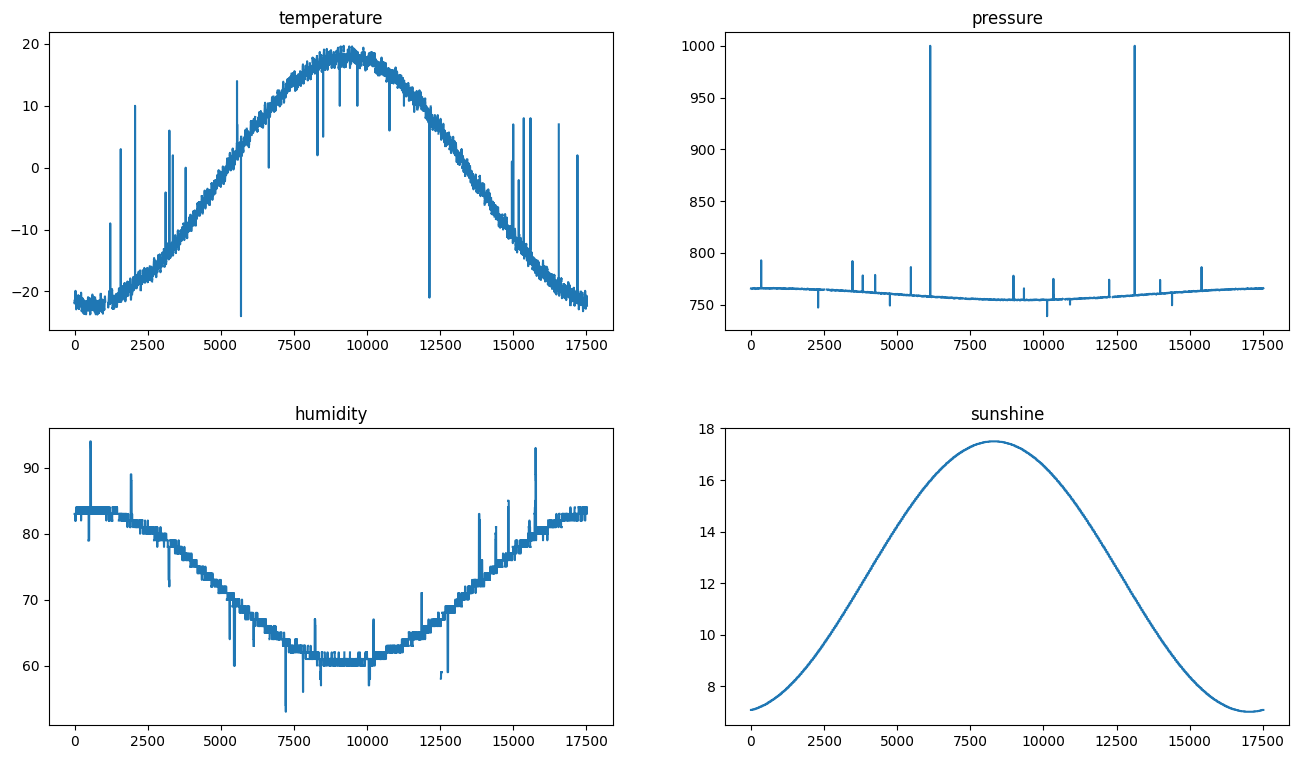

In [4]:
fig, axs = plt.subplots(2,2, figsize=(16,9))
axs[0,0].plot(df['temperature'])
axs[0,0].set_title('temperature')
axs[0,1].plot(df['pressure'])
axs[0,1].set_title('pressure')
axs[1,0].plot(df['humidity'])
axs[1,0].set_title('humidity')
axs[1,1].plot(df['sunshine'])
axs[1,1].set_title('sunshine')
plt.subplots_adjust(hspace=0.33)
plt.show()

---
### Очистка данных

- Удалить nan;
- Заменить выбросы усреднёнными значениями: посредством скользящего окна найти локальные межквартильные интервалы и средние значения заменить выбросы средними.

In [5]:
df_clean = df.dropna()

In [6]:
def get_iqr_bounds(data:pd.Series) -> (float, float):
    Q1 = np.percentile(data, 25) 
    Q2 = np.percentile(data, 50) 
    Q3 = np.percentile(data, 75) 
    IQR = Q3 - Q1 
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, Q2, upper_bound

In [7]:
def clean_column_slice(column_slice:pd.Series) -> None:
    lower_bound, mean, upper_bound = get_iqr_bounds(column_slice)
    column_slice.where(pd.notnull(column_slice), mean, inplace=True)
    column_slice.where(column_slice > lower_bound, mean, inplace=True)
    column_slice.where(column_slice < upper_bound, mean, inplace=True)
    return None

In [8]:
def clean_column(column:pd.Series, width:int=48*30) -> None:
    begin = 0
    end = width
    
    while end < len(column):
        current_slice = column.iloc[begin:end] 
        
        clean_column_slice(current_slice)
        
        begin += width
        end += width
    
    clean_column_slice(column.iloc[begin:])
    return None

In [9]:
clean_column(df_clean.temperature, width=48*14)
clean_column(df_clean.pressure, width=48*14)
clean_column(df_clean.humidity, width=48*14)
clean_column(df_clean.sunshine, width=48*14)

---
### Визуализация отфильтрованных данных

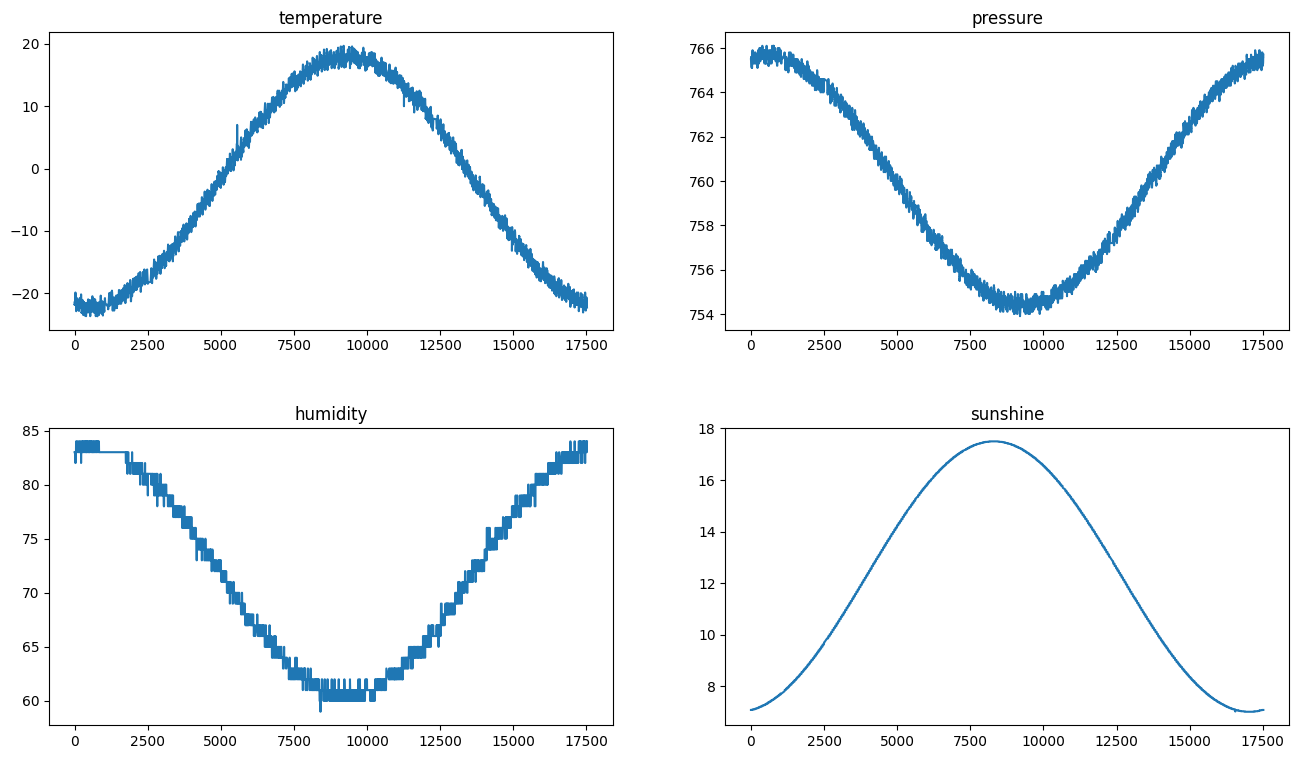

In [10]:
fig, axs = plt.subplots(2,2, figsize=(16,9))
axs[0,0].plot(df_clean['temperature'])
axs[0,0].set_title('temperature')
axs[0,1].plot(df_clean['pressure'])
axs[0,1].set_title('pressure')
axs[1,0].plot(df_clean['humidity'])
axs[1,0].set_title('humidity')
axs[1,1].plot(df_clean['sunshine'])
axs[1,1].set_title('sunshine')
plt.subplots_adjust(hspace=0.33)
plt.show()